## Exploratory Data Analysis

In [1]:
#Import libraries
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [7]:
# Create your connection.
con = sqlite3.connect('indicators.sqlite3')

In [8]:
climate_data = pd.read_sql_query("SELECT * FROM climate_indicators", con)
economic_data = pd.read_sql_query("SELECT * FROM econ_indicators", con)

### Exploring climate data

In [9]:
#print the head of the data frame.
climate_data.head()

,country,iso_code,year,gdp_capita,gini_index,co2_emissions_kt,co2_emissions_capita,forest_area,population,electricity_pro_hydro,...,electricity_pro_fossils,electricity_pro_renewable,pm_25,sf6_emissions,ghg_total,ghg_growth,ghg_capita,exports_gns,imports_gns,mean_surface_temp
0,Aruba,ABW,1995,16439.356361,NaN,NaN,NaN,2.333333,80324.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.573
1,Aruba,ABW,1996,16583.875856,NaN,NaN,NaN,2.333333,83211.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.727
2,Aruba,ABW,1997,17927.959439,NaN,NaN,NaN,2.333333,85450.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,1998,19077.687427,NaN,NaN,NaN,2.333333,87280.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,1999,19355.333536,NaN,NaN,NaN,2.333333,89009.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
climate_data.tail()

,country,iso_code,year,gdp_capita,gini_index,co2_emissions_kt,co2_emissions_capita,forest_area,population,electricity_pro_hydro,...,electricity_pro_fossils,electricity_pro_renewable,pm_25,sf6_emissions,ghg_total,ghg_growth,ghg_capita,exports_gns,imports_gns,mean_surface_temp
5245,Zimbabwe,ZWE,2015,1445.069702,NaN,12400.0,0.897598,45.689363,13814642.0,51.395612,...,47.275724,1.328664,21.733709,NaN,31280.0,5.03,3.10,3.824969e+09,7.503865e+09,1.226
5246,Zimbabwe,ZWE,2016,1464.588957,NaN,10990.0,0.783303,45.570273,14030338.0,NaN,...,NaN,NaN,21.726947,NaN,29120.0,171.67,8.30,4.628243e+09,7.258021e+09,1.470
5247,Zimbabwe,ZWE,2017,1235.189032,44.3,10230.0,0.718570,45.451183,14236599.0,NaN,...,NaN,NaN,22.251671,NaN,28800.0,-0.37,8.15,4.850708e+09,7.493755e+09,0.443
5248,Zimbabwe,ZWE,2018,1254.642265,NaN,12270.0,0.849793,45.332093,14438812.0,NaN,...,NaN,NaN,NaN,NaN,31380.0,2.31,8.23,3.385144e+09,4.995969e+09,0.747
5249,Zimbabwe,ZWE,2019,1316.740657,50.3,NaN,NaN,45.213002,14645473.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.359


In [21]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      5250 non-null   object 
 1   iso_code                     5250 non-null   object 
 2   year                         5250 non-null   int64  
 3   gdp_capita                   4995 non-null   float64
 4   gini_index                   1511 non-null   float64
 5   co2_emissions_kt             4584 non-null   float64
 6   co2_emissions_capita         4584 non-null   float64
 7   forest_area                  5134 non-null   float64
 8   population_total             5217 non-null   float64
 9   electricity_pro_hydro        2903 non-null   float64
 10  electricity_pro_natural_gas  2903 non-null   float64
 11  electricity_pro_nuclear      2798 non-null   float64
 12  electricity_pro_oil          2903 non-null   float64
 13  electricity_pro_co

In [10]:
climate_data.shape

(5250, 24)

In [6]:
#checking unique values for categorical variable
climate_data["iso_code"].nunique()

210

### Missing values analysis

In [11]:
percent_missing = climate_data.isnull().sum() * 100 / len(climate_data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
country,0.000000
iso_code,0.000000
year,0.000000
gdp_capita,4.857143
gini_index,71.219048
co2_emissions_kt,12.685714
co2_emissions_capita,12.685714
forest_area,2.209524
population,0.628571
electricity_pro_hydro,44.704762


In [12]:
def missing_values_graph(frame, obs, time, var, Yname):
    test = frame[[obs, time, var]]
    test[var].fillna(-1, inplace=True)
    test = test.groupby([obs, time])[var].aggregate('mean').unstack()
    test[test > 0] = 1
    cmap = sns.xkcd_palette(["grey", "blue"])
    plt.figure(figsize=(10, 5))
    ax = sns.heatmap(test, center=0, cmap=cmap, cbar=False,
                     cbar_kws={'ticks': [-1, 0, 1]})
    ax.set(yticklabels=[])
    plt.ylabel(Yname+ " (N=" + str(len(test)) + ")", fontsize=14)
    plt.xlabel("")
    plt.title((var + "\nmissing values (grey), availabe values (blue)"),
              fontsize=14)
    plt.tight_layout()
    plt.show()

The above function creates a graph for the variable of interest. On the y-axsis you see the the observations (names in this case). On the x-axis you see the years. Available values are highlighed blue, while missing data are grey.

<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


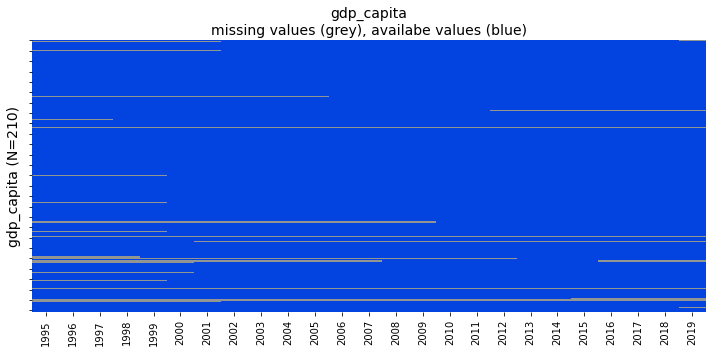

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


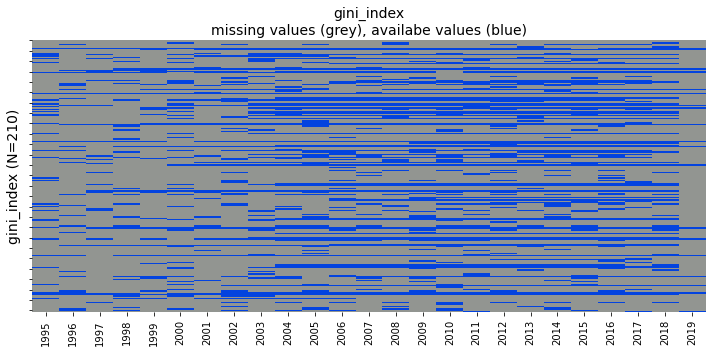

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


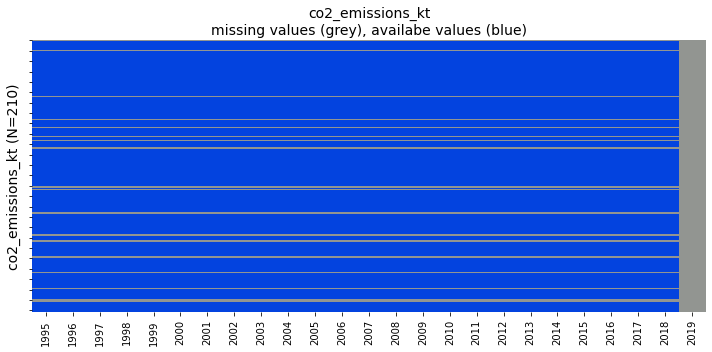

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


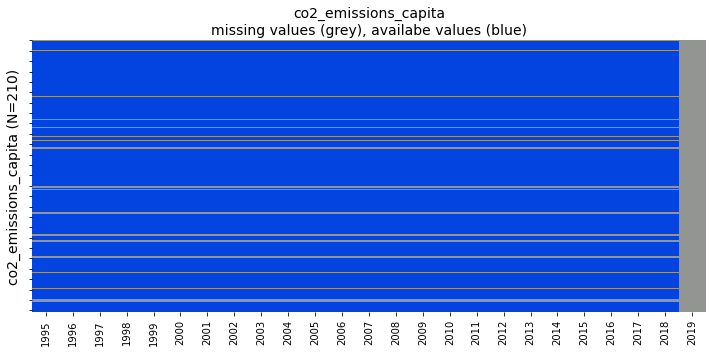

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


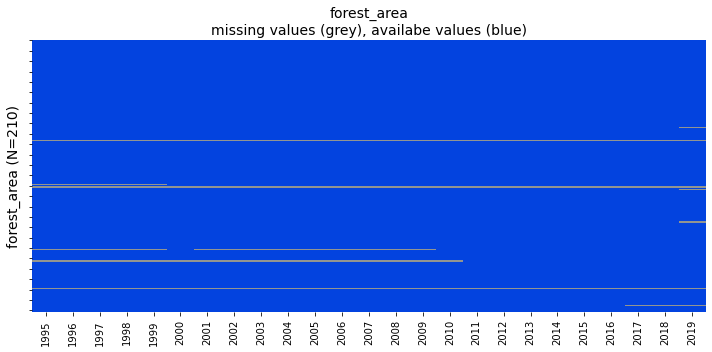

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


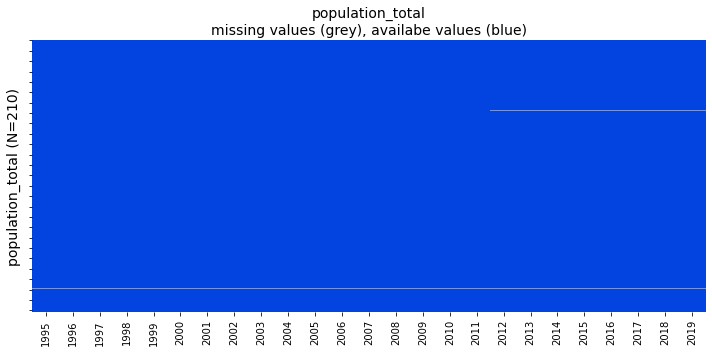

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


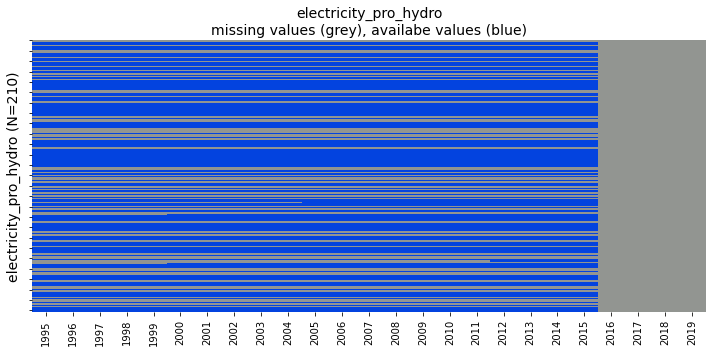

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


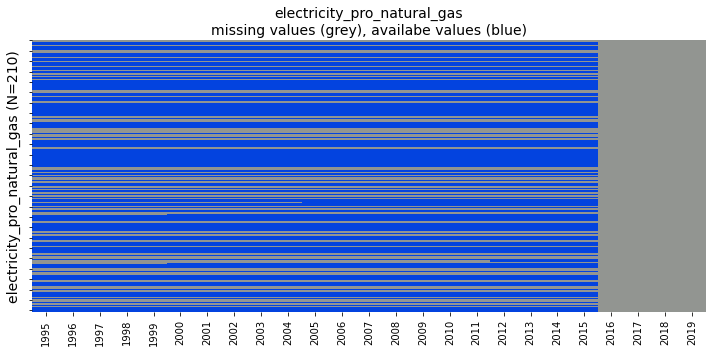

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


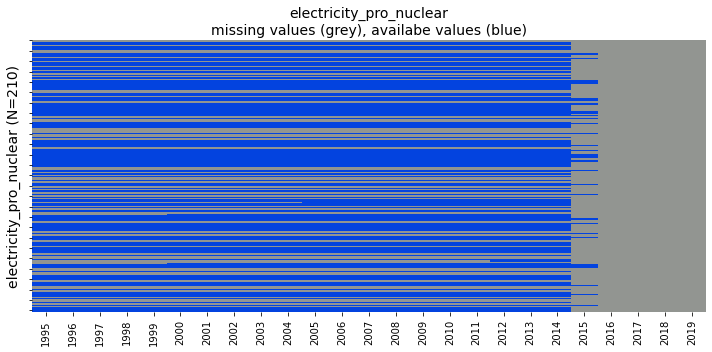

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


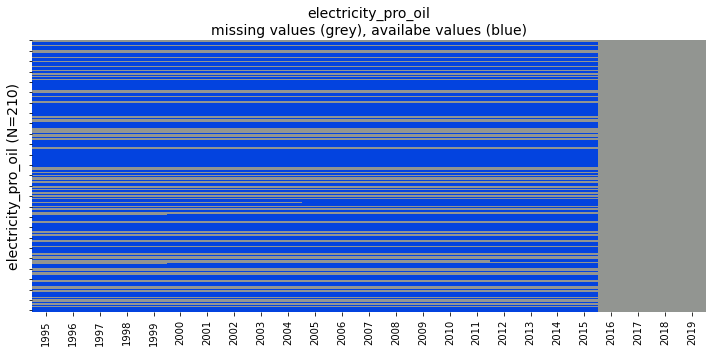

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


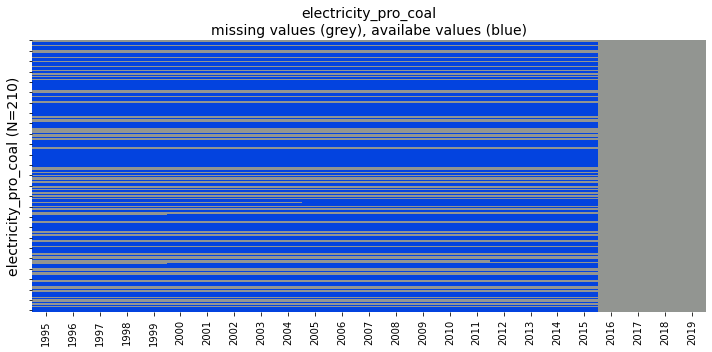

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


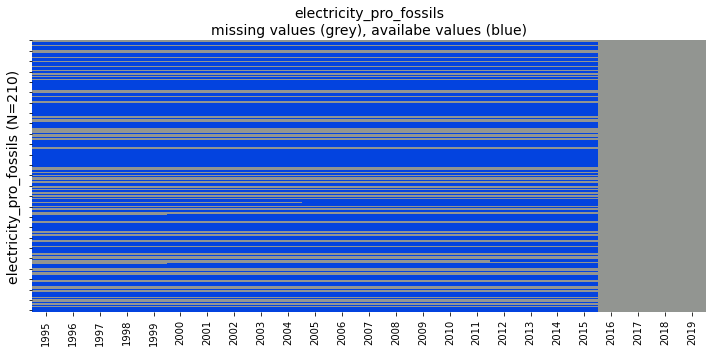

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


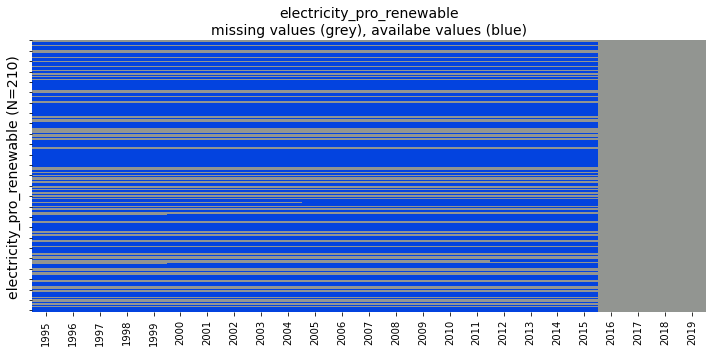

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


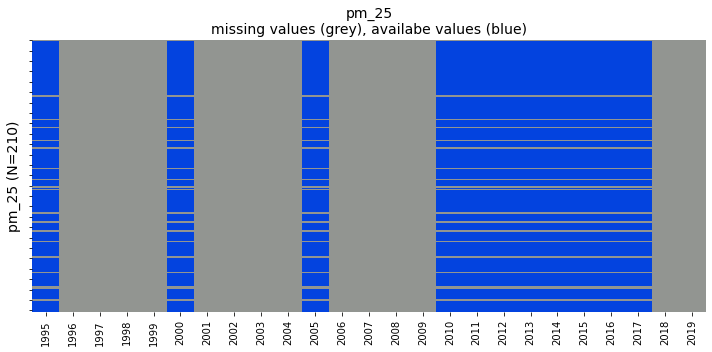

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


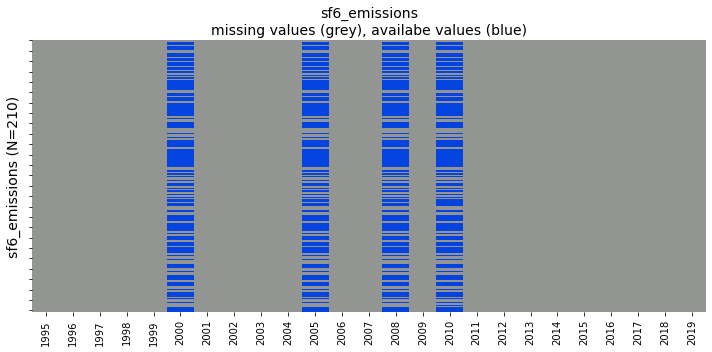

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


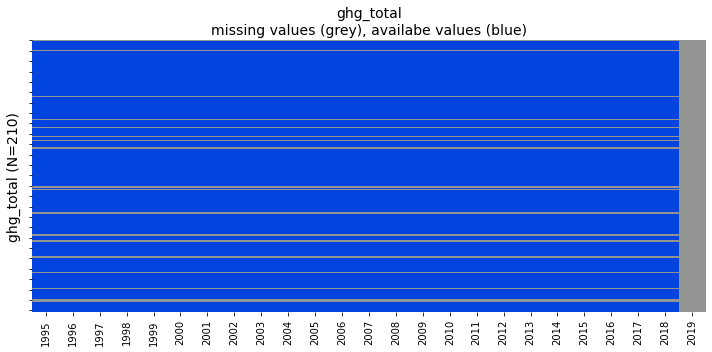

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


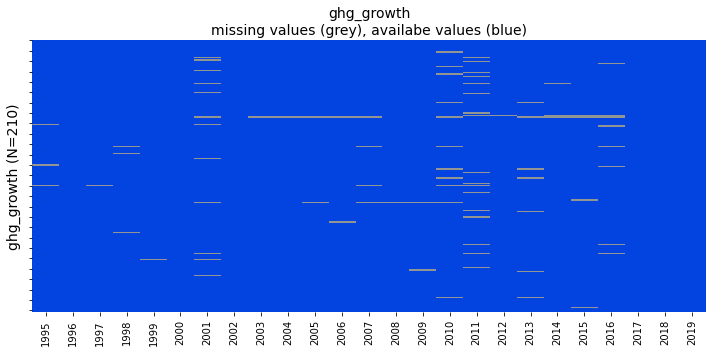

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


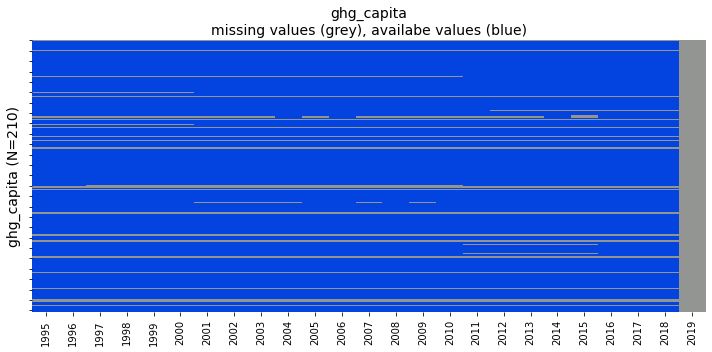

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


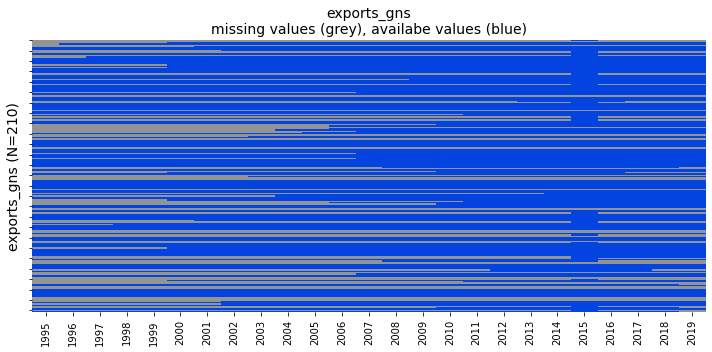

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


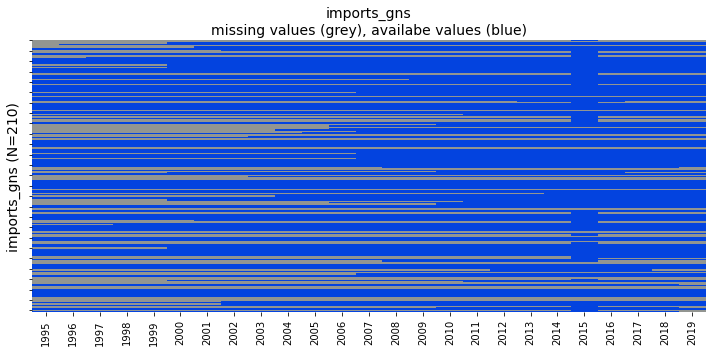

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


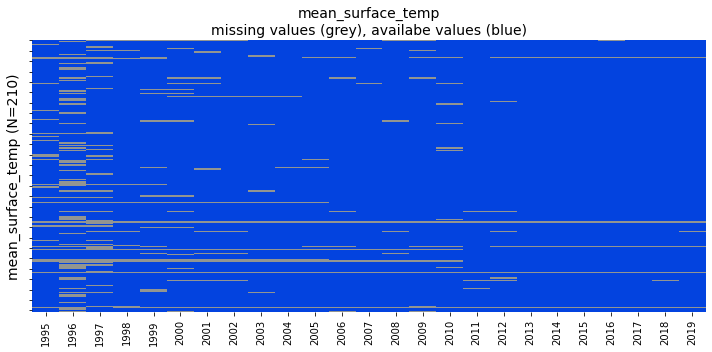

None


In [11]:
for col in climate_data.columns[3:]:
    print(missing_values_graph(climate_data, "iso_code", "year", col, col))

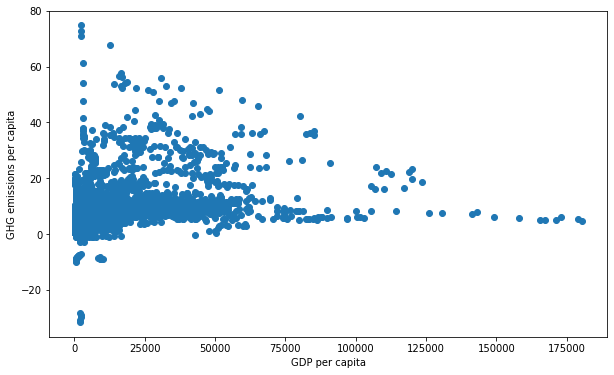

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = climate_data['gdp_capita'], y = climate_data['ghg_capita'])
plt.xlabel("GDP per capita")
plt.ylabel("GHG emissions per capita")
plt.show()

### Exploring economic data

In [13]:
economic_data.head()

,country,iso_code,year,gdp_constant_change,gdp_capita,vol_imports_change,vol_exports_change,population,gdp_current
0,Afghanistan,AFG,1995,,,,,,
1,Albania,ALB,1995,8.9,4582.93,0.0,,3.188,9.643
2,Algeria,DZA,1995,3.848,8158.72,2.0,5.733,28.06,204.348
3,Angola,AGO,1995,10.364,3973.12,27.968,12.24,14.771,37.582
4,Antigua and Barbuda,ATG,1995,-4.359,16127.97,,,0.067,0.909


In [14]:
economic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6240 entries, 0 to 6239
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              6240 non-null   object
 1   iso_code             6240 non-null   object
 2   year                 6240 non-null   int64 
 3   gdp_constant_change  6240 non-null   object
 4   gdp_capita           6240 non-null   object
 5   vol_imports_change   6240 non-null   object
 6   vol_exports_change   6240 non-null   object
 7   population           6240 non-null   object
 8   gdp_current          6240 non-null   object
dtypes: int64(1), object(8)
memory usage: 438.9+ KB


In [15]:
# convert string columns to numeric dtype
for col in economic_data.columns[3:]:
    economic_data[col]=pd.to_numeric(economic_data[col])
economic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6240 entries, 0 to 6239
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              6240 non-null   object 
 1   iso_code             6240 non-null   object 
 2   year                 6240 non-null   int64  
 3   gdp_constant_change  6086 non-null   float64
 4   gdp_capita           6080 non-null   float64
 5   vol_imports_change   5445 non-null   float64
 6   vol_exports_change   5477 non-null   float64
 7   population           6102 non-null   float64
 8   gdp_current          6109 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 438.9+ KB


In [16]:
percent_missing = economic_data.isnull().sum() * 100 / len(climate_data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df  

,percent_missing
country,0.000000
iso_code,0.000000
year,0.000000
gdp_constant_change,2.933333
gdp_capita,3.047619
vol_imports_change,15.142857
vol_exports_change,14.533333
population,2.628571
gdp_current,2.495238


In [17]:
economic_data.shape

(6240, 9)

In [13]:
print("Unique countries in  economic data", economic_data["iso_code"].nunique())
print("Unique countries in climate data", climate_data["iso_code"].nunique())

Unique countries in  economic data 195
Unique countries in climate data 210


In [14]:
s1 = climate_data.iso_code.unique().tolist()
s2 = economic_data.iso_code.unique().tolist()
## countries in economic data that are not in climate data
set(s1).difference(s2)

{'AND',
 'ASM',
 'CUB',
 'CYM',
 'FRO',
 'GIB',
 'GRL',
 'IMN',
 'LIE',
 'MCO',
 'NCL',
 'PRK',
 'PSE',
 'PYF',
 'TCA',
 'VGB',
 'VIR',
 'WLD'}

<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


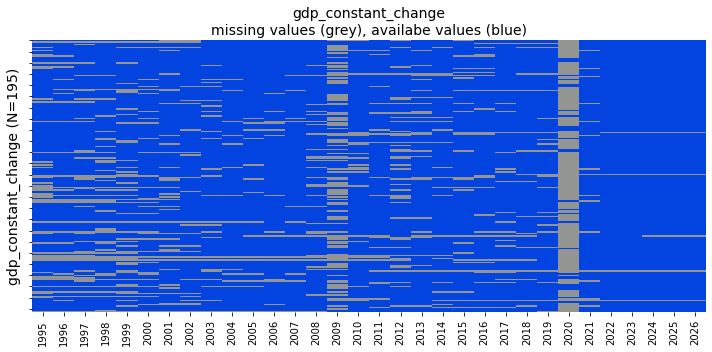

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


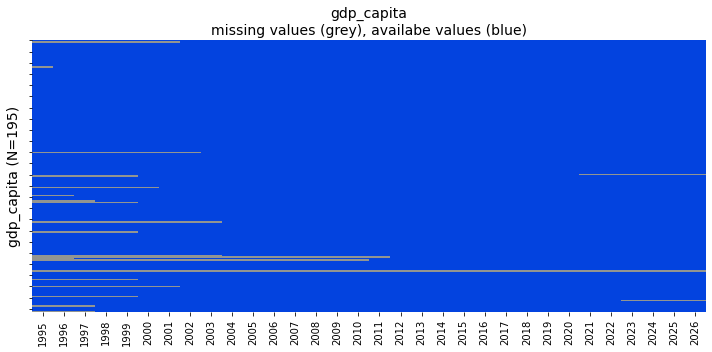

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


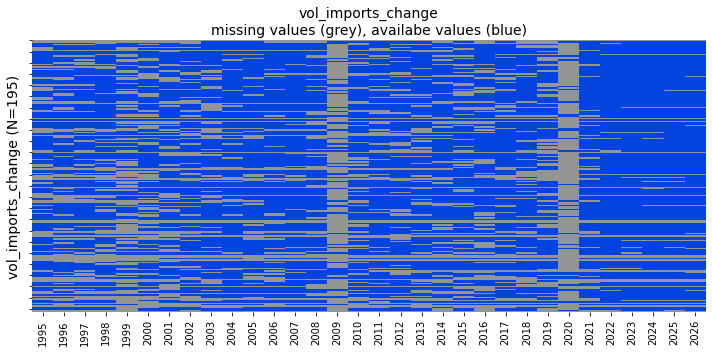

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


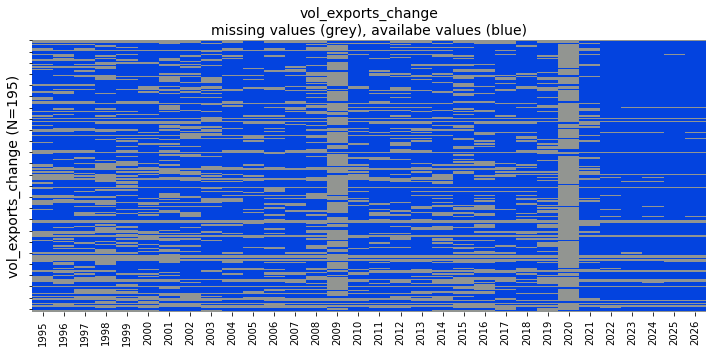

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


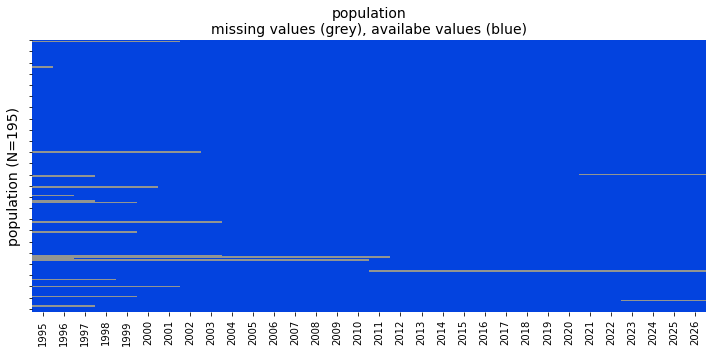

None


<ipython-input-10-b4eabe084a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var].fillna(-1, inplace=True)


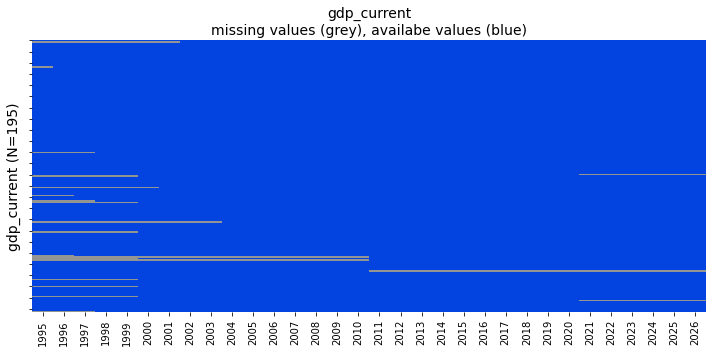

None


In [20]:
for col in economic_data.columns[3:]:
    print(missing_values_graph(economic_data, "iso_code", "year", col, col))

In [ ]:
#merged climate data and economic data
data = pd.merge(economic_data, climate_data, on = ["iso_code", "year", "country"], how = "left")